## **i. Mount google drive**
---

In [205]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [206]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [207]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [208]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [209]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7f65e9265a70>


## **Question a**
---
Read in the image 'aria.jpg' and display the image

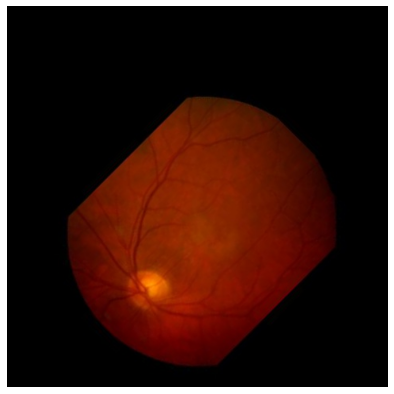

In [210]:
# Type your code below

src = cv2.imread('aria.jpg')
cv2plt(src)

In [211]:
src.shape

(480, 480, 3)

## **Question b**
---
Shift the image up by 50 pixels and show the output

In [212]:
# Type your code below
(row,col,_) = src.shape

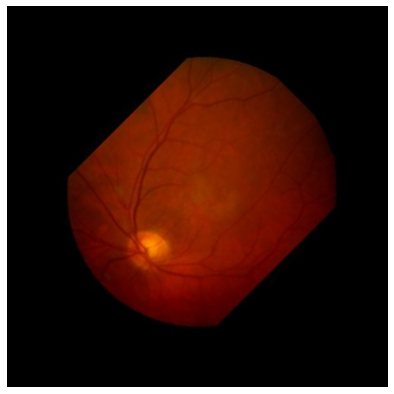

In [213]:
# Type your code below
Mt = np.float32([[1, 0, 0], 
                [0, 1, -50]])
tr = cv2.warpAffine(src, Mt, (row,col))
cv2plt(tr)

## **Question c**
---
Rotate the image by 45 degrees, clockwise with respect to the image center

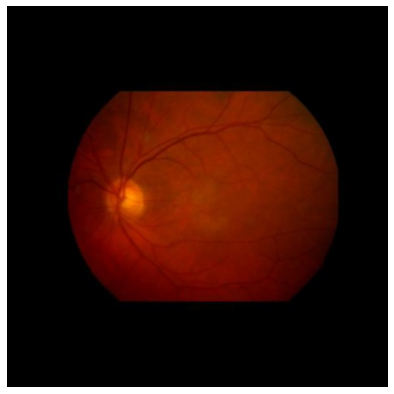

In [214]:
(row,col,_) = tr.shape
Mr = cv2.getRotationMatrix2D((col/2,row/2), -45, 1)
tr = cv2.warpAffine(tr, Mr, (row,col))
cv2plt(tr)

## **Question d**
___
Create a mask that consists only of the retinal region. Run the code below to see the required output.

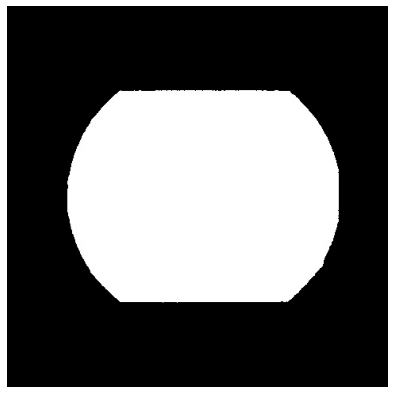

In [215]:
im=cv2.imread('wks2_2_d.jpg')
cv2plt(im)

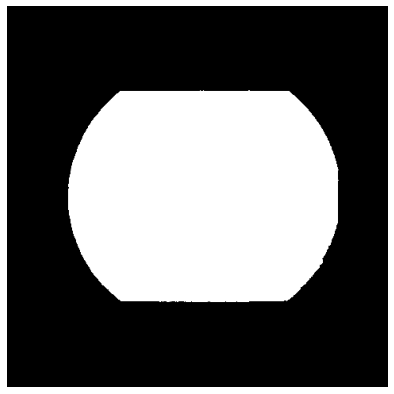

In [216]:
tr2 = cv2.cvtColor(tr, cv2.COLOR_BGR2GRAY)
(_,tr3) = cv2.threshold(tr2, 11, 255, cv2.THRESH_BINARY)
cv2plt(tr3)   

## **Question e**
---
Read in image 'neu.jpg' and create a mask that segments all the elements in the image. Run the code below to see the required output.

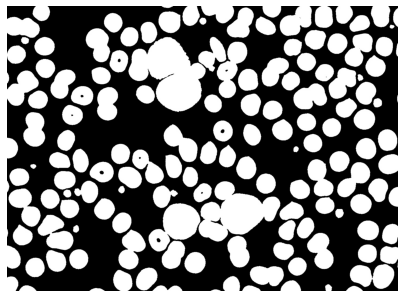

In [217]:
cv2plt(cv2.imread('wks2_2_e.jpg'))

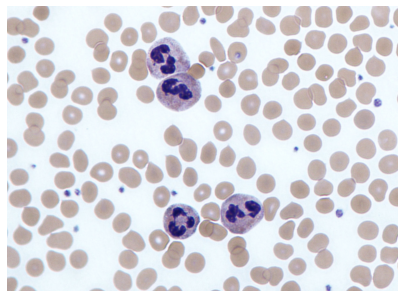

In [218]:
neu = cv2.imread('neu.jpg')
cv2plt(neu)

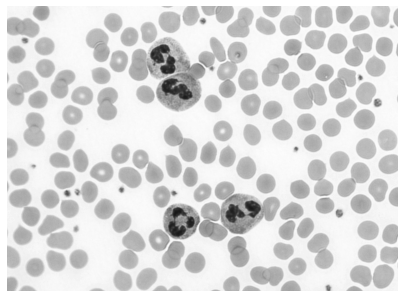

In [219]:
tr1 = cv2.cvtColor(neu, cv2.COLOR_BGR2GRAY)
cv2plt(tr1)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.40000e+02,
        6.72000e+02, 1.32800e+03, 2.18800e+03, 2.77500e+03, 2.79400e+03,
        3.18800e+03, 1.81600e+03, 1.34800e+03, 1.03900e+03, 8.60000e+02,
        7.16000e+02, 6.38000e+02, 5.32000e+02, 5.64000e+02, 5.89000e+02,
        7.70000e+02, 8.12000e+02, 1.00800e+03, 1.34400e+03, 1.75100e+03,
        2.39400e+03, 3.17800e+03, 4.23000e+03, 5.59500e+03, 6.84200e+03,
        1.08220e+04, 1.63390e+04, 3.39990e+04, 6.31460e+04, 1.06150e+05,
        1.41528e+05, 1.23194e+05, 6.00860e+04, 2.91240e+04, 1.97360e+04,
        1.94030e+04, 1.43540e+04, 1.36640e+04, 1.39300e+04, 1.49080e+04,
        1.75500e+04, 3.54810e+04, 2.13858e+05, 4.78757e+05, 6.71600e+04]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

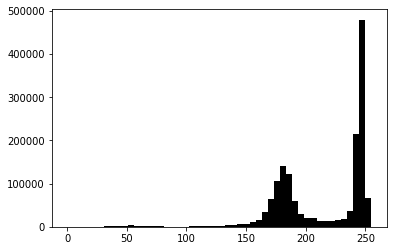

In [220]:
plt.hist(tr1.ravel(), 
 50, 
 [0,255], 
 facecolor= 'black')

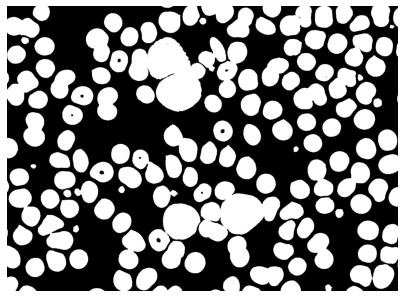

In [221]:
(_,tr2) = cv2.threshold(tr1,220 , 255, cv2.THRESH_BINARY_INV)
cv2plt(tr2)